# K-Nearest Neighbors Classifier

## Setup

In [2]:
%pip install numpy==2.2.0
%pip install pandas==2.2.3
%pip install scikit-learn==1.6.0
%pip install matplotlib==3.9.3
%pip install seaborn==0.13.2

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

## Accessing the dataset

In [20]:
# df = pd.read_csv('../_program resources/teleCust1000t.csv')

df = pd.read_csv("C:/Users/Andrew-John/Documents/_Github/lessons/personal/_resources/APTSHBA.csv")
df

,#,Content,Google Maps Link,Link,Bedrooms,Bathrooms,SQFT,Photos,Monthly Cost,Full Address,...,Higher or lower than average,Above/Below Average Population,Households,White,Hispanic,Black,Asian,Mixed,Other,Sum
0,6,"9915 E Franklin Ave9915 E Franklin Ave, Glenn ...",https://www.google.com/maps/place/9915+E+Frank...,https://www.apartments.com/9915-e-franklin-ave...,1,1,--\r,10,650.00,"9915 E Franklin Ave, Glenn Dale, MD 20769",...,Lower than Average Population,-0.81,2175,0.15,0.09,0.64,0.07,0.04,0.01,1.0
1,3,"5122 Decatur St5122 Decatur St, Hyattsville, M...",https://www.google.com/maps/place/5122+Decatur...,https://www.apartments.com/5122-decatur-st-hya...,1,1,--\r,3,750.00,"5122 Decatur St, Hyattsville, MD 20781",...,Lower than Average Population,-0.70,3853,0.24,0.40,0.31,0.02,0.02,0.01,1.0
2,19,"1961 Lewis Ave1961 Lewis Ave, Rockville, MD 20851",https://www.google.com/maps/place/1961+Lewis+A...,https://www.apartments.com/1961-lewis-ave-rock...,1,1,150,8,"1,200.00","1961 Lewis Ave, Rockville, MD 20851",...,Lower than Average Population,-0.60,4891,0.36,0.36,0.09,0.15,0.04,0.00,1.0
3,37,"403 Calvin Ln, Rockville, MD 20851",https://www.google.com/maps/place/403+Calvin+L...,https://www.apartments.com/403-calvin-ln-rockv...,1,1,--\r,2,750.00,"403 Calvin Ln, Rockville, MD 20851",...,Lower than Average Population,-0.60,4891,0.36,0.36,0.09,0.15,0.04,0.00,1.0
4,16,"7726 Acrocomia Dr7726 Acrocomia Dr, Severn, MD...",https://www.google.com/maps/place/7726+Acrocom...,https://www.apartments.com/7726-acrocomia-dr-s...,1,1,--\r,19,949.00,"7726 Acrocomia Dr, Severn, MD 21076",...,Lower than Average Population,-0.57,6348,0.47,0.05,0.27,0.15,0.05,0.01,1.0
5,25,"2863 Chain Bridge Rd2863 Chain Bridge Rd, Vien...",https://www.google.com/maps/place/2863+Chain+B...,https://www.apartments.com/2863-chain-bridge-r...,1,1,188,21,850.00,"2863 Chain Bridge Rd, Vienna, VA 22181",...,Lower than Average Population,-0.58,5233,0.64,0.10,0.05,0.16,0.04,0.00,1.0
6,9,"2235 Quincy St NE2235 Quincy St NE, Washington...",https://www.google.com/maps/place/2235+Quincy+...,https://www.apartments.com/2235-quincy-st-ne-w...,1,1,--\r,20,"1,000.00","2235 Quincy St NE, Washington, DC 20018",...,Lower than Average Population,-0.46,7861,0.12,0.04,0.81,0.01,0.01,0.00,1.0
7,10,"3504 18th St NE3504 18th St NE, Washington, DC...",https://www.google.com/maps/place/3504+18th+St...,https://www.apartments.com/3504-18th-st-ne-was...,1,1,--\r,20,975.00,"3504 18th St NE, Washington, DC 20018",...,Lower than Average Population,-0.46,7861,0.12,0.04,0.81,0.01,0.01,0.00,1.0
8,44,"2609 Franklin St NE, Washington, DC 20018",https://www.google.com/maps/place/2609+Frankli...,https://www.apartments.com/2609-franklin-st-ne...,1,1,--\r,15,825.00,"2609 Franklin St NE, Washington, DC 20018",...,Lower than Average Population,-0.46,7861,0.12,0.04,0.81,0.01,0.01,0.00,1.0
9,18,"5220 57th Ave5220 57th Ave, Riverdale, MD 20737",https://www.google.com/maps/place/5220+57th+Av...,https://www.apartments.com/5220-57th-ave-river...,1,1,110,2,680.00,"5220 57th Ave, Riverdale, MD 20737",...,Lower than Average Population,-0.41,5798,0.12,0.49,0.33,0.03,0.02,0.01,1.0


In [82]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [83]:
correlation_matrix = df.corr()

# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.show()

In [84]:
correlation_values = abs(df.corr()['custcat']).drop('custcat').sort_values(ascending=False)
correlation_values

# Observe that education and tenure have the highest correlation with the target variable custcat.
# Observe that retirement and gender have the lowest correlation with the target variable custcat.

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

In [85]:
#  Split the data into features and target variable
# X is the feature set
# y is the target variable
X = df.drop('custcat', axis=1)
y = df['custcat']

## Normalize Data

In [86]:
X_norm = StandardScaler().fit_transform(X)

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## KNN Classification

### Training

In [88]:
k = 3 # What is the accuracy result? 0.275
# k = 6 # What is the accuracy result? 0.29
# Train model and predict
knn = KNeighborsClassifier(n_neighbors=k)
knn_model = knn.fit(X_train, y_train)

### Predicting

In [89]:
# What is yhat?
# yhat is the predicted labels for the test set
yhat = knn_model.predict(X_test)

### Accuracy Evaluation

In [90]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.275


### Choosing the correct value of k

In [118]:
# What is Ks, acc, std_acc?
# Ks is the number of neighbors to consider for KNN
# acc is the accuracy of the model for each value of k
# std_acc is the standard deviation of the accuracy for each value of k
# What does np.zeros do?
# np.zeros creates an array of zeros with the specified shape with the length equaling the value of variable 'Ks'
# This allows us to initialize the arrays for storing accuracy results 

Ks = 10 # Result? The best accuracy was with 0.345 when k = 7
# Ks = 30 # Result? The best accuracy was with 0.36 when k = 28
# Ks = 100 # Result? The best accuracy was with 0.4 when k = 78
# Ks = 800 # Result? The best accuracy was with 0.405 when k = 114
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))

# Loop through different values of k (number of neighbors)
# Using Ks+1 to include the last desired value in the range (1 to Ks, i.e., 1 to 10) - remember Python is 0-indexed
for n_neighbors in range(1, Ks+1):
    # Train model and predict
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train) # Create a KNN classifier with the current value of k
    yhat = knn.predict(X_test) # Predict the labels for the test set
    acc[n_neighbors-1] = accuracy_score(y_test, yhat) # Store the accuracy score for the current value of k
    std_acc[n_neighbors-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0]) # Store the standard deviation of the accuracy score for the current value of k

### Plot the model accuracy for the range of numbers of neighbors (1 - Ks)

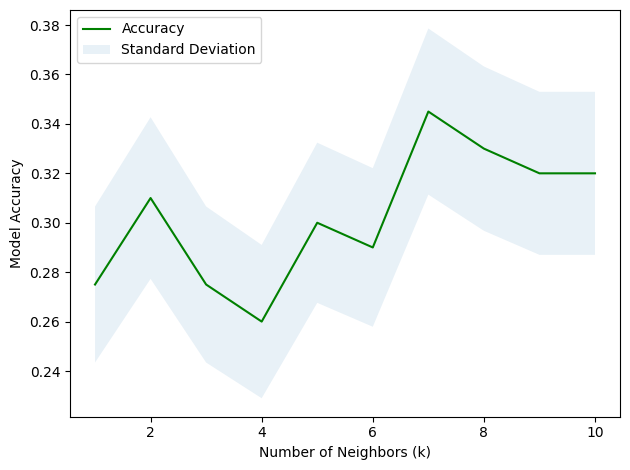

In [119]:
plt.plot(range(1,Ks+1),acc,'g') # Plot the accuracy scores for the range of 1-ks neighbors with 'g' indicating green color
plt.fill_between(range(1, Ks+1), acc - 1 * std_acc, acc + 1 * std_acc, alpha=0.10) # Fill the area between the upper and lower bounds of the accuracy scores with a transparency of 0.10
plt.legend(('Accuracy', 'Standard Deviation')) # First value is the label for the accuracy line, second value is the label for the standard deviation area
plt.ylabel('Model Accuracy') # Label for the y-axis
plt.xlabel('Number of Neighbors (k)') # Label for the x-axis
plt.tight_layout() # Adjust the layout of the plot to make it look better
plt.show() # Show the plot

In [120]:
print(f"For Ks = {Ks}, the best accuracy was with {acc.max()} when k = {acc.argmax()+1}") # Print the maximum accuracy and the corresponding value of k

For Ks = 10, the best accuracy was with 0.345 when k = 7


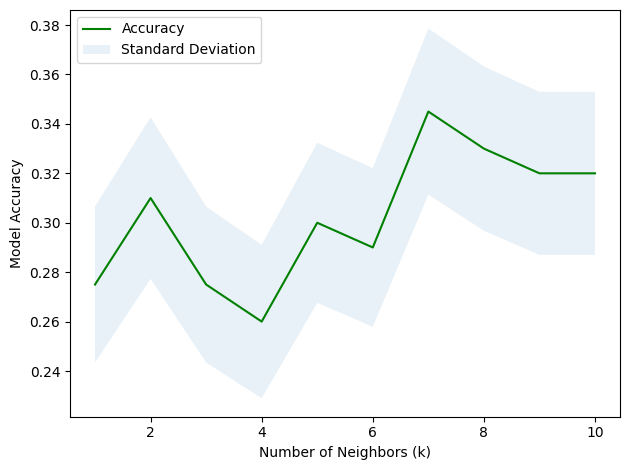

For Ks = 10, the best accuracy was with 0.345 when k = 7

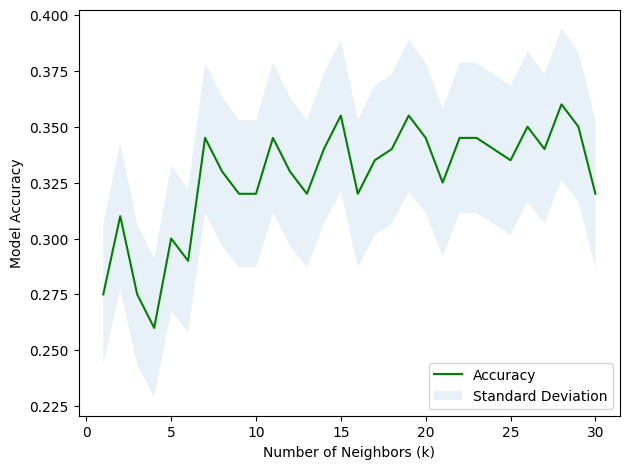

For Ks = 30, the best accuracy was with 0.36 when k = 28

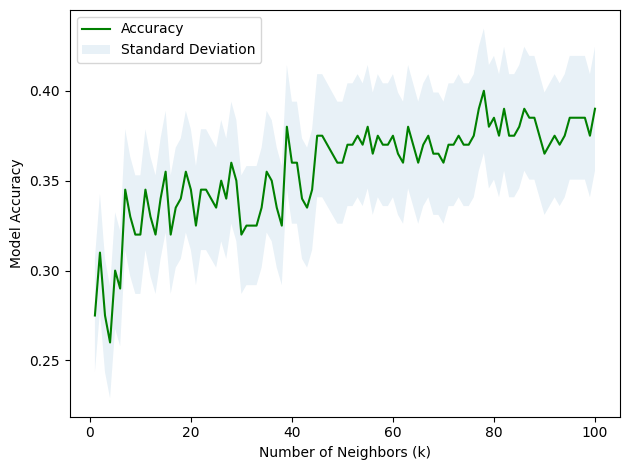

For Ks = 100, the best accuracy was with 0.4 when k = 78

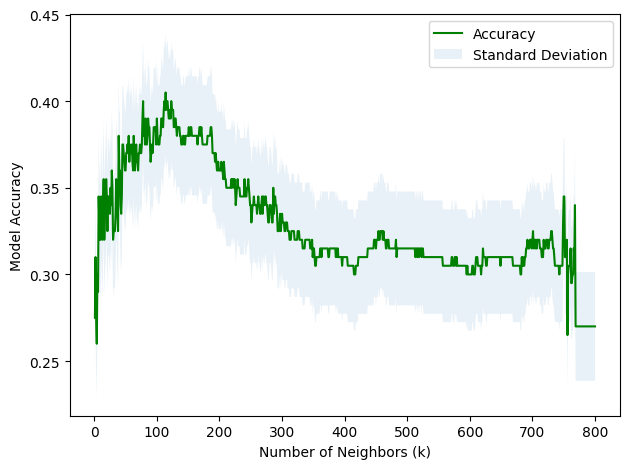

For Ks = 800, the best accuracy was with 0.405 when k = 114

## Why does model performance deteriorate as k increases in value?

- The model performance deteriorates with more neighbors because the model becomes too generalized and starts to include noise in the data, leading to overfitting.
- The model may also become less sensitive to the underlying patterns in the data, resulting in a decrease in accuracy.